# Diabetes Prediction 

# 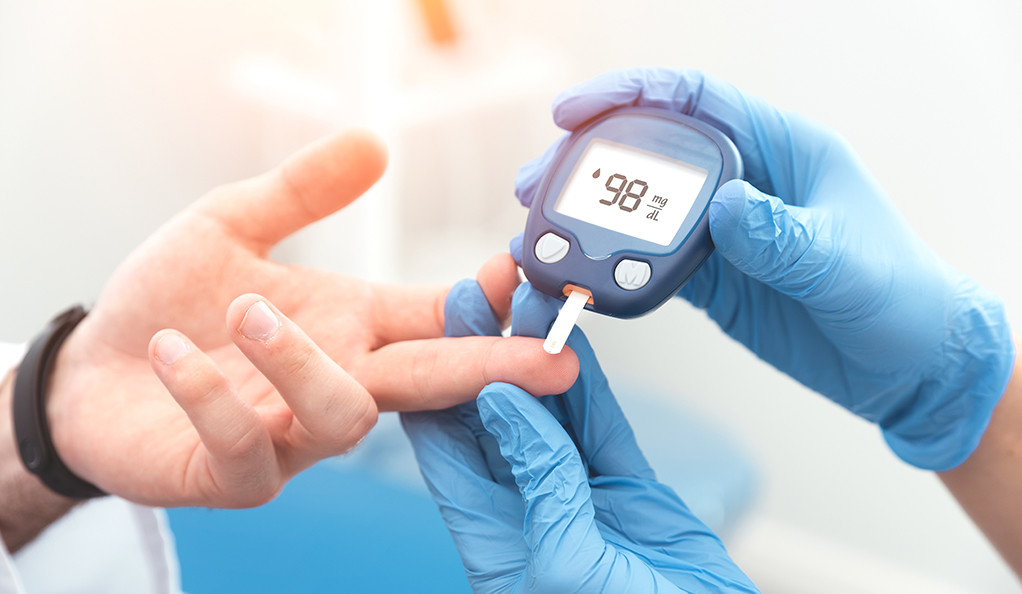

# Project Aim and Objective 

1. The objective of this machine learning (ML) project is to develop a predictive model for heart disease based on a patient's health and demographic features.
2. The model will utilize historical data of patients diagnosed with heart disease to learn patterns and relationships between the features and the disease outcome.
3. The primary goal of this project is to improve the diagnosis and treatment of heart disease by providing doctors and healthcare professionals with a reliable and accurate tool for predicting the disease outcome.

## About Dataset
Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

#1.Pregnancies: Number of times pregnant
#2.Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#3.BloodPressure: Diastolic blood pressure (mm Hg)
#4.SkinThickness: Triceps skin fold thickness (mm)
#5.Insulin: 2-Hour serum insulin (mu U/ml)
#6.BMI: Body mass index (weight in kg/(height in m)^2)
#7.DiabetesPedigreeFunction: Diabetes pedigree function
#8.Age: Age (years)
#9.Outcome: Class variable (0 or 1)

# General Information on Variables
 *1.Glucose Tolerance Test*

It is a blood test that involves taking multiple blood samples over time, usually 2 hours.It used to diagnose diabetes. The results can be classified as normal, impaired, or abnormal.

--Normal Results for Diabetes -> Two-hour glucose level less than 140 mg/dL

--Impaired Results for Diabetes -> Two-hour glucose level 140 to 200 mg/dL

--Abnormal (Diagnostic) Results for Diabetes -> Two-hour glucose level greater than 200 mg/dL

*2.BloodPressure*

The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.

--Normal: Systolic below 120 and diastolic below 80

--Elevated: Systolic 120–129 and diastolic under 80

--Hypertension stage 1: Systolic 130–139 and diastolic 80–89

--Hypertension stage 2: Systolic 140-plus and diastolic 90 or more

--Hypertensive crisis: Systolic higher than 180 and diastolic above 120.

*3.BMI*

The standard weight status categories associated with BMI ranges for adults are shown in the following table.

--Below 18.5 -> Underweight

--18.5 – 24.9 -> Normal or Healthy Weight

--25.0 – 29.9 -> Overweight

--30.0 and Above -> Obese

*4.Triceps Skinfolds*

For adults, the standard normal values for triceps skinfolds are:

-- 18.0mm (women)

# Importing Libraries 

In [1]:
# Dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
# data preprocessing
from sklearn.preprocessing import RobustScaler
# data splitting
from sklearn.model_selection import train_test_split,GridSearchCV
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
# loading model
import pickle

In [2]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [3]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('../dataset/diabetes.csv')

# Exploratory Data Analysis 

In [4]:
# Sample Data 
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
print ('*'*10,'Dataset Information','*'*10)
print(df.info())

********** Dataset Information **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
#Generating descriptive statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


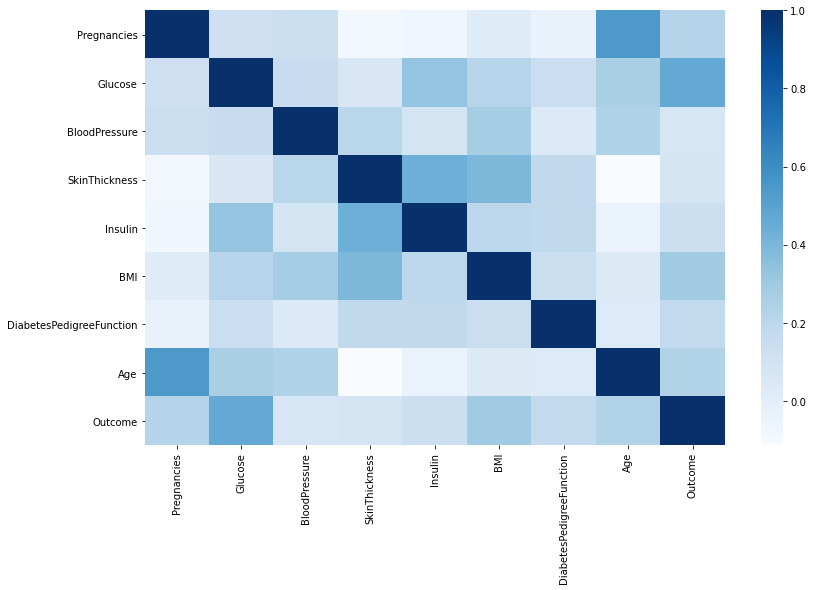

In [7]:
# Correlation Matrix 
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

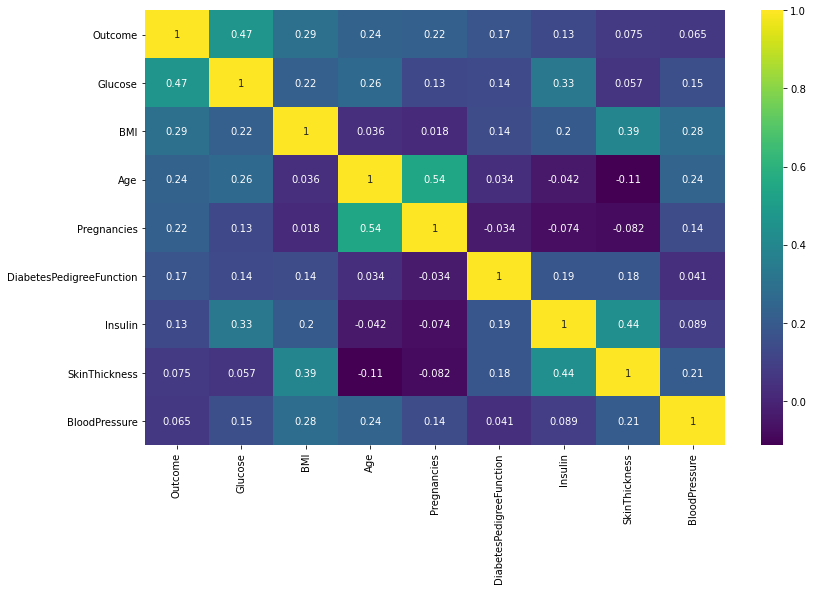

In [8]:
#Outcome correlation matrix
k = 9 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(13,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D5E7B01790>,
      dtype=object)

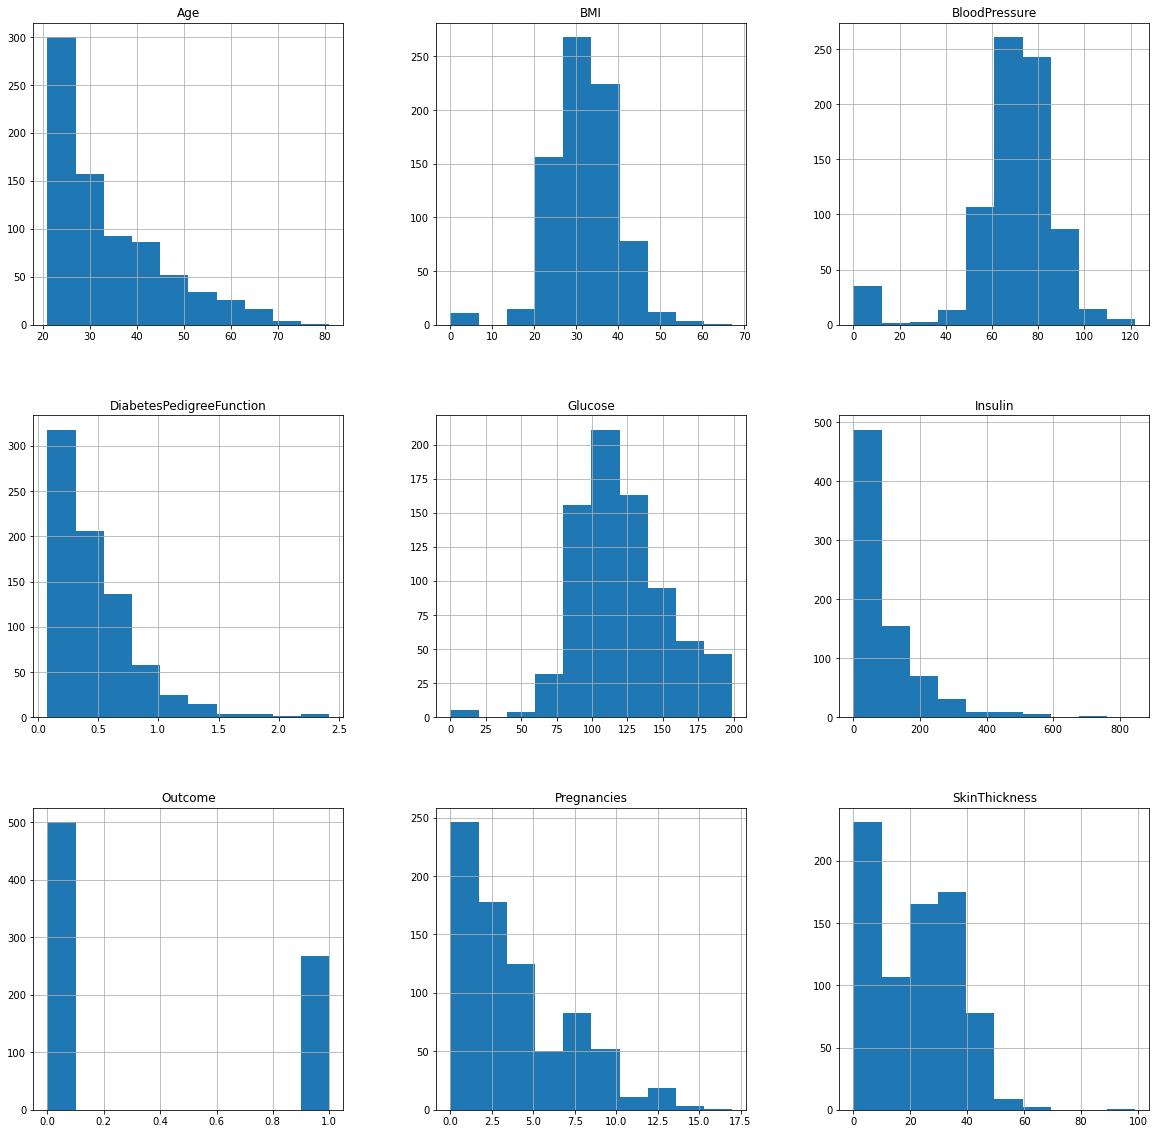

In [9]:
# see how the data is distributed.
df.hist(figsize = (20,20))

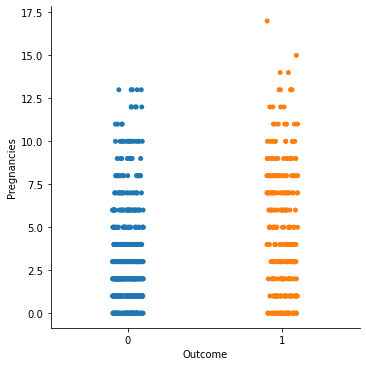

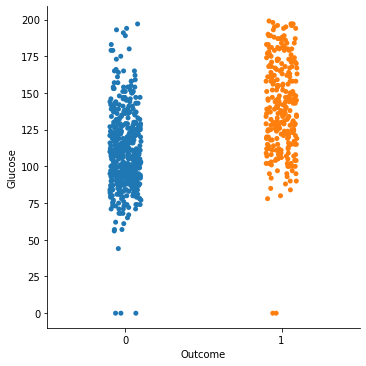

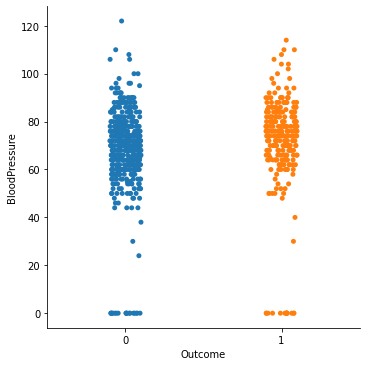

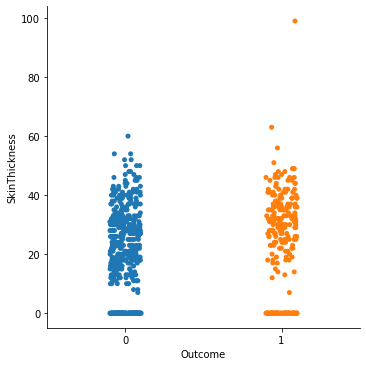

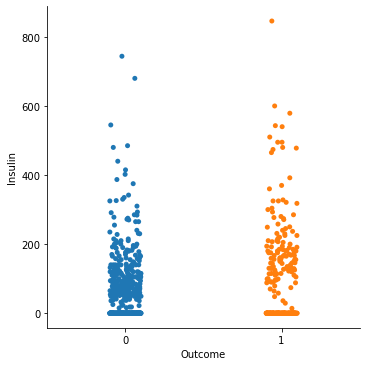

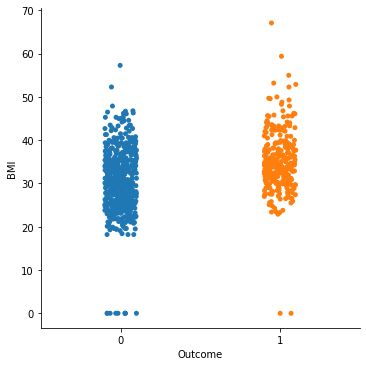

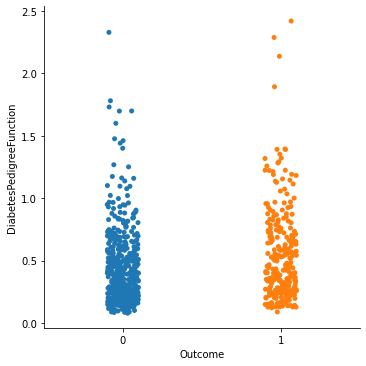

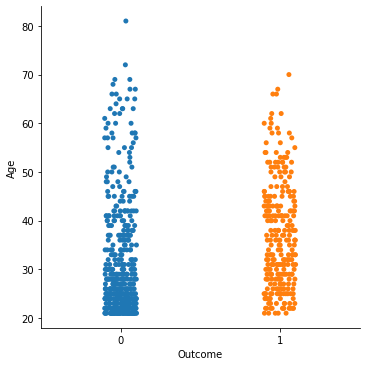

In [10]:
for col in df.columns:
    if col != "Outcome":
        sns.catplot("Outcome", col, data = df)

# Data Preprocessing 

In [11]:
# checking Nan values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Replacing 0 with NaN and replacing Nan with median 
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0,np.NaN,inplace=True)
# We can fill in NaN values with a median according to the target
for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()),col] = df[df["Outcome"]==0][col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()),col] = df[df["Outcome"]==1][col].median()

In [13]:
# Checking for Outliers 
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")
for col in df.columns:
    has_outliers(df, col)

SkinThickness yes
Insulin yes
DiabetesPedigreeFunction yes


In [14]:
# Relpcing with Treshold Values 
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
replace_with_thresholds(df, df.columns)

In [15]:
# Modelling 
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

# Data Train , Test split with 80% for training and 20% for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

# Scaler object for normalizing the input data to have zero mean and unit variance.
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Gradient Boosting Classifier Model 

In [16]:
# initialize the GBClassifier 
gb_clf = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 2, n_estimators = 30, random_state=42)

# fit the classifier to the training data
gb_clf.fit(X_train, y_train)

# predict on the test data
y_pred = gb_clf.predict(X_test)

# evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix: \n", cm)

Accuracy: 0.8961038961038961
Precision: 0.803921568627451
Recall: 0.8723404255319149
F1-score: 0.8367346938775511
Confusion Matrix: 
 [[97 10]
 [ 6 41]]


# Inputing raw data

In [17]:
input_data = (5,166,72,19,175,25.8,0.33,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# performing scalling 
input_data = scaler.transform(input_data_reshaped)

prediction = gb_clf.predict(input_data)

print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0.]
The person is not diabetic


# Saving the Model 

In [18]:

# Saving model as heart_disease_prediction.sav file 
filename = 'diabetes_prediction.sav'
pickle.dump(gb_clf, open(filename, 'wb'))
pickle.dump(scaler, open('scaler_diabetes.sav', 'wb'))
# loading the saved model
loaded_model = pickle.load(open('diabetes_prediction.sav', 'rb'))

# Printing the cols 
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
